# Exploring Subreddit Mentions of ASX listed Stocks and their Prices.   

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./asxbets_posts.csv', delimiter='\t')

In [3]:
df.head()

,Date_UTC,Time,Body,User,Post
0,2020-06-13,03:39:33,Post for the weekend of 13-14 June *I thought ...,_TheLordOfRuin_,1
1,2020-06-13,03:47:08,Today wasn't even that red given where we open...,malbro08,0
2,2020-06-13,03:54:19,I was Kenny Rogers today knowing when to Hold ...,miamivice85,0
3,2020-06-13,04:18:01,Bring out the disco bears lads.,Albusmaddog,0
4,2020-06-13,14:27:16,Who is here holding NVX long term? I have legi...,Notarandomthrowaway1,0


## Cleaning 

In [4]:
def make_stock_col(row):
    '''Parse Body Text with Regex to extract, ASX
    Codes, make new column with a set of codes
    '''
    pattern = "[A-Z|1-9]{3,4}"
    regex = re.compile(pattern)
    codes = regex.findall(row['Body'])
    # remove duplicates
    codes = list(frozenset(codes))
    if len(codes) == 0:
        codes = None
    row['ASX_Codes'] = codes
    
    return row

df = df.apply(make_stock_col, axis=1)

In [5]:
df.head()

,Date_UTC,Time,Body,User,Post,ASX_Codes
0,2020-06-13,03:39:33,Post for the weekend of 13-14 June *I thought ...,_TheLordOfRuin_,1,None
1,2020-06-13,03:47:08,Today wasn't even that red given where we open...,malbro08,0,None
2,2020-06-13,03:54:19,I was Kenny Rogers today knowing when to Hold ...,miamivice85,0,None
3,2020-06-13,04:18:01,Bring out the disco bears lads.,Albusmaddog,0,None
4,2020-06-13,14:27:16,Who is here holding NVX long term? I have legi...,Notarandomthrowaway1,0,"[NVX, BTC]"


In [6]:
# get all posts including at least one ASX code.
df = df[~df['ASX_Codes'].isna()]
df.head()


,Date_UTC,Time,Body,User,Post,ASX_Codes
4,2020-06-13,14:27:16,Who is here holding NVX long term? I have legi...,Notarandomthrowaway1,0,"[NVX, BTC]"
13,2020-06-13,20:16:01,How many autists does it take to pump a stock ...,obnoxis,1,[NVX]
14,2020-06-13,20:18:39,Somebody go pump this stock on Whirlpool forum...,Richard_Fuld_2020,0,[EOFY]
17,2020-06-13,21:25:33,Much better throwing it into VUL,didgi98,0,[VUL]
18,2020-06-13,08:41:16,Glad I found this sub! Moved from NY to Syd an...,RatchetCliquet,1,[ASX]


In [7]:
df_multi_asx = df[df['ASX_Codes'].str.len()>1]

# iterate over rows of df with mutiple ASX codes
for idx, row in df_multi_asx.iterrows():
    # iterate over the amount of the codes
    for idx, code in enumerate(range(len(row['ASX_Codes']))):
        
        row['ASX_Code'] = row['ASX_Codes'][idx]
        
        df_multi_asx = df_multi_asx.append(row)
df_multi_asx.reindex()

,Date_UTC,Time,Body,User,Post,ASX_Codes,ASX_Code
4,2020-06-13,14:27:16,Who is here holding NVX long term? I have legi...,Notarandomthrowaway1,0,"[NVX, BTC]",NaN
48,2020-06-13,06:27:26,Two things. \n\nOne - positions?\n\nTwo - do y...,calicotrinket,0,"[NSW, VIC]",NaN
79,2020-06-13,03:52:33,ENTER PLAYER TWO.,SelfWealthAus,0,"[TWO, ENTE, PLAY]",NaN
88,2020-06-13,03:13:39,Is it Karen and Greg who are [ working offsite...,AussieFIdoc,0,"[416, ASIC]",NaN
101,2020-06-13,11:57:13,[Excellent](https://lh3.googleusercontent.com/...,AussieFIdoc,0,"[WAD, FODS, 862V, GWP, 3Q9, K5Q, SV8, 1DYE, IK...",NaN
...,...,...,...,...,...,...,...
10546,2020-04-23,00:44:53,I guess because I plan on holding VAS for the ...,OverflowingSarcasm,0,"[VAS, GEAR, ETF]",VAS
10546,2020-04-23,00:44:53,I guess because I plan on holding VAS for the ...,OverflowingSarcasm,0,"[VAS, GEAR, ETF]",GEAR
10546,2020-04-23,00:44:53,I guess because I plan on holding VAS for the ...,OverflowingSarcasm,0,"[VAS, GEAR, ETF]",ETF
10549,2020-04-23,20:05:48,Probably looking at ~30% tax on any BBOZ gains...,OverflowingSarcasm,0,"[VAS, BBOZ]",VAS


In [8]:
# remove the NaN Codes, the post has now been successfully sepearated.
df_multi_asx[~df_multi_asx['ASX_Code'].isna()]

,Date_UTC,Time,Body,User,Post,ASX_Codes,ASX_Code
4,2020-06-13,14:27:16,Who is here holding NVX long term? I have legi...,Notarandomthrowaway1,0,"[NVX, BTC]",NVX
4,2020-06-13,14:27:16,Who is here holding NVX long term? I have legi...,Notarandomthrowaway1,0,"[NVX, BTC]",BTC
48,2020-06-13,06:27:26,Two things. \n\nOne - positions?\n\nTwo - do y...,calicotrinket,0,"[NSW, VIC]",NSW
48,2020-06-13,06:27:26,Two things. \n\nOne - positions?\n\nTwo - do y...,calicotrinket,0,"[NSW, VIC]",VIC
79,2020-06-13,03:52:33,ENTER PLAYER TWO.,SelfWealthAus,0,"[TWO, ENTE, PLAY]",TWO
...,...,...,...,...,...,...,...
10546,2020-04-23,00:44:53,I guess because I plan on holding VAS for the ...,OverflowingSarcasm,0,"[VAS, GEAR, ETF]",VAS
10546,2020-04-23,00:44:53,I guess because I plan on holding VAS for the ...,OverflowingSarcasm,0,"[VAS, GEAR, ETF]",GEAR
10546,2020-04-23,00:44:53,I guess because I plan on holding VAS for the ...,OverflowingSarcasm,0,"[VAS, GEAR, ETF]",ETF
10549,2020-04-23,20:05:48,Probably looking at ~30% tax on any BBOZ gains...,OverflowingSarcasm,0,"[VAS, BBOZ]",VAS


In [9]:
df_single_asx = df[df['ASX_Codes'].str.len()==1]; df_single_asx.shape

(2298, 6)

In [10]:
def pop_code(row):
    # get out the one element in list
    row['ASX_Code'] = row['ASX_Codes'][0]
    return row

df_single_asx = df_single_asx.apply(pop_code, axis=1)

In [11]:
# join table with one ASX code and mutiple codes
df_all = df_single_asx.append(df_multi_asx)

# Zip Pay (Z1P)

In [12]:
# Create a Dataframe that groups by Date and Where the stock mentioned is Z1P
zip_grouped = df_all[df_all['ASX_Code'] == 'Z1P'].groupby('Date_UTC').count()
zip_grouped = zip_grouped.reset_index()

zip_grouped['Date_UTC'] = pd.to_datetime(zip_grouped['Date_UTC'])

In [13]:
df_zip = df_all[df_all['ASX_Code'] == 'Z1P']

In [14]:
zip_asx = pd.read_csv('./Z1P.AX.csv'); zip_asx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-04,2.32,2.45,2.26,2.35,2.35,9517500
1,2020-05-05,2.43,2.62,2.39,2.60,2.60,11729925
2,2020-05-06,2.75,2.94,2.70,2.82,2.82,15835686
3,2020-05-07,2.83,3.00,2.70,2.86,2.86,11589265
4,2020-05-08,3.11,3.42,3.08,3.27,3.27,20427132


In [15]:
# used to ensure plotting works on date axis
zip_asx['Date'] = pd.to_datetime(zip_asx['Date'])

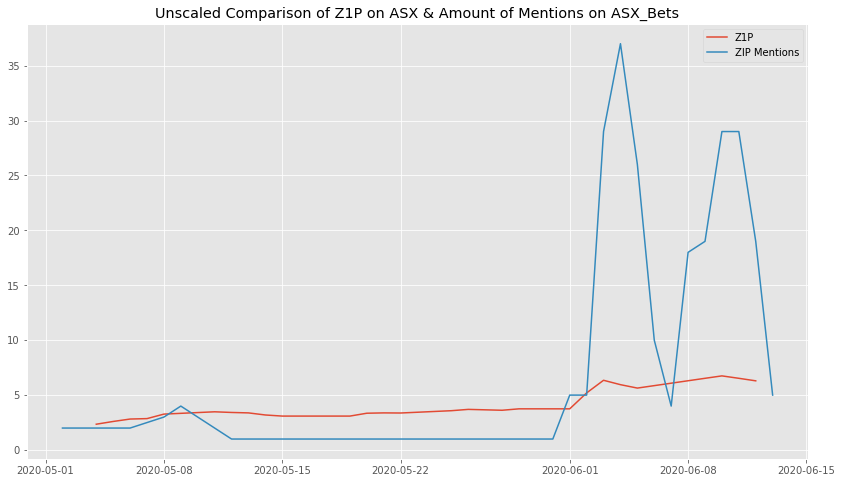

In [16]:
plt.figure(figsize=(14,8))
plt.plot(zip_asx['Date'], zip_asx['Close'], label='Z1P')
plt.plot(zip_grouped['Date_UTC'], zip_grouped['ASX_Code'], label='ZIP Mentions')
plt.title('Unscaled Comparison of Z1P on ASX & Amount of Mentions on ASX_Bets')
plt.legend();

**Note:**<br>Even though the values are not scaled we can still observe some slight spikes in the mentions.

In [17]:
scaler = StandardScaler()
# get the z-scores for the values to enable a good comparison.
zip_grouped['ASX_Code_scaled'] = scaler.fit_transform(zip_grouped['ASX_Code'].values.reshape(-1,1))
zip_asx['ASX_Close_scaled'] = scaler.fit_transform(zip_asx['Close'].values.reshape(-1,1))

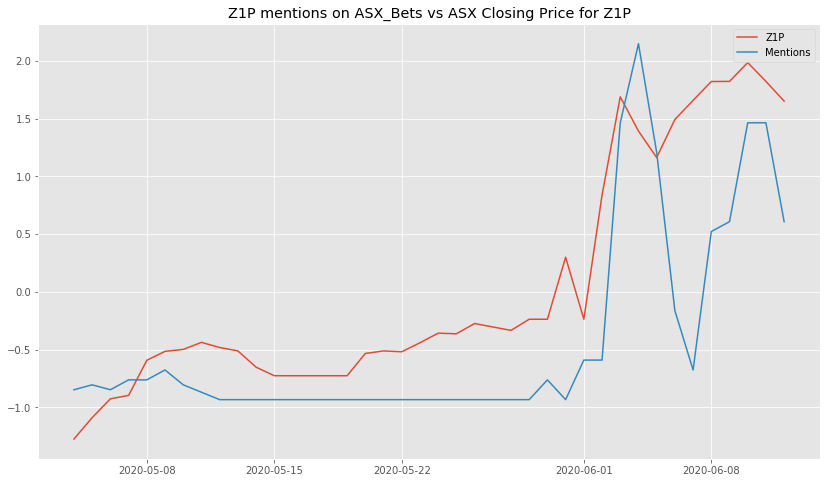

In [64]:
plt.figure(figsize=(14,8))
plt.plot(zip_asx['Date'], zip_asx['ASX_Close_scaled'], label='Z1P')
plt.plot(zip_grouped['Date'], zip_grouped['ASX_Code_scaled'], label='Mentions')
plt.title('Z1P mentions on ASX_Bets vs ASX Closing Price for Z1P')
plt.savefig('./zip_asx_bets_vs_asx_price.png', format='png')

plt.legend();

<Figure size 432x288 with 0 Axes>

**Interpretation**<br>
ASX_Bets Small spike around the first week of May. However, the mentions plateued until a month later. A rapid increase in both the mentions and the ASX price. Mentions seem to be lagging behind the price by about a day. After, the spike in mentions the mentions fall rapidly. It seems that the mentions on the subreddit are still lagging behind Z1P Closing price.

### Using Granger Causality to Determine Causality.
Granger Causality is a statitisical technique to determine whether one time series causes another.

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests
import datetime

In [20]:
zip_asx['ASX_Close_scaled'].shape, zip_grouped['ASX_Code_scaled'].shape

((29,), (21,))

In [21]:
zip_grouped = zip_grouped.rename(columns={'Date_UTC': 'Date'})

In [22]:
min_date, max_date = zip_asx.Date.min(), zip_asx.Date.max()

In [23]:
min_date, max_date

(Timestamp('2020-05-04 00:00:00'), Timestamp('2020-06-12 00:00:00'))

In [24]:
def make_empty_days(df, min_date, max_date, date_col='Date'):
    '''Creates empty rows in Dataframe for
    for missing days and fills with zero.
    Returns: Dataframe with Date as index.
    '''
    df = df.set_index(date_col)
    idx = pd.date_range(min_date, max_date)
    # change df to a datetime index
    df.index = pd.DatetimeIndex(df.index)
    # makes empty days (usually weekends)
    df = df.reindex(idx, fill_value=0)
    return df

zip_asx = make_empty_days(zip_asx, min_date, max_date) 
zip_grouped = make_empty_days(zip_grouped, min_date, max_date)


In [25]:
def fill_weekend(df, empty_col):
    '''Create columns for weekends, fill in with concave function
    find day before empty date, call it ,y. find next non-empty day,
    call it y. Compute y+x/2 and fill in empty row.
    '''
    date_idxs = df[df[empty_col] == 0].index

    for date in date_idxs:
        # get next non-empty day
        # start two days ahead, check if not check next day
        dates_ahead = df.loc[date + datetime.timedelta(2):]
        # get the next non-empty date 
        next_trading_days = dates_ahead[dates_ahead[empty_col] != 0]
        # edge case, if the last day is empty
        if next_trading_days.size == 0:
            continue
        next_trading = next_trading_days.index[0]
     
        # get previous days value
        # if first day is empty, use next trading day
        try:
            prev_day = df.loc[date - datetime.timedelta(1)]
            df.loc[date] = (prev_day + df.loc[next_trading]) / 2
        except:
            df.loc[date] = df.loc[next_trading]
        

            
    return df

        
zip_asx = fill_weekend(zip_asx, 'Open')   
zip_asx = zip_asx.reset_index()
zip_asx = zip_asx.rename(columns={'index': 'Date'})

zip_grouped = fill_weekend(zip_grouped, 'ASX_Code')   
zip_grouped = zip_grouped.reset_index()
zip_grouped = zip_grouped.rename(columns={'index': 'Date'})

In [26]:
# MISTAKE I THINK
# # returns duplicate columns as boolean array
# ~zip_asx.columns.duplicated()
# # remove the first two duplicate columns for Date
# zip_asx = zip_asx.loc[:,[ False, False, True,  True,  True,  True,  True,  True,  True,
#         True]]

In [27]:
zip_asx.sample(3)

,Date,Open,High,Low,Close,Adj Close,Volume,ASX_Close_scaled
39,2020-06-12,5.9,6.48,5.7000,6.30,6.30,20772948.0,1.651252
26,2020-05-30,3.7,3.75,3.6575,3.75,3.75,3326948.0,-0.237535
14,2020-05-18,3.2,3.20,3.0700,3.09,3.09,6367052.0,-0.726398


In [28]:
zip_asx['ASX_Close_scaled'].shape, zip_grouped['ASX_Code_scaled'].shape

((40,), (40,))

In [29]:
import numpy as np
# create 2 column Dataframe for granger causality
asx_and_bets = pd.DataFrame(
    {'ASX' : zip_asx['Close'],
     'ASX_Bets': zip_grouped['ASX_Code']})

In [30]:
# is column 2 determing column 1?
test_result = grangercausalitytests(asx_and_bets, 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0713  , p=0.3075  , df_denom=36, df_num=1
ssr based chi2 test:   chi2=1.1606  , p=0.2813  , df=1
likelihood ratio test: chi2=1.1437  , p=0.2849  , df=1
parameter F test:         F=1.0713  , p=0.3075  , df_denom=36, df_num=1


**Interpretation**:<br> The F-test has a p-value of 0.3075, which is greater that our level of significance, 0.05. Therefore we fail to reject our null hypothesis. ASX_Bets Mentions do not determine any stock prices. This is most probably due to the large size of zip relative to smaller stocks.

In [31]:
# reordering the columns of the data frame
test_result = grangercausalitytests(asx_and_bets[['ASX_Bets', 'ASX']], 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.4526 , p=0.0004  , df_denom=36, df_num=1
ssr based chi2 test:   chi2=16.7403 , p=0.0000  , df=1
likelihood ratio test: chi2=13.9285 , p=0.0002  , df=1
parameter F test:         F=15.4526 , p=0.0004  , df_denom=36, df_num=1


**Interpretation**:<br> Here, we have tested whether, the ASX determines ASX_Bets mentions of the Zip stock, really just a sanity check. Here we have strong evidence that indeed ASX 'Granger-causes' the amount users speak about Zip Pay.

### Let's Narrow the time frame 
If we refer back to Zips Mentions before 29th of May, majority of time there is only one mention. I figured maybe this sideways trend could be effecting the potential Grange Causality. So, I have trimmed the dates to begin after the 29th.  

In [32]:
zip_snip = zip_grouped[zip_grouped['Date'] > '2020-05-29']

zip_asx['Date'] = pd.to_datetime(zip_asx['Date'])
zip_asx_snip = zip_asx[zip_asx['Date'] > '2020-05-29']

asx_bets_snip = pd.DataFrame(
    {'ASX' : zip_asx_snip['Close'],
     'ASX_Bets': zip_snip['ASX_Code']})

# is column 2 determing column 1?
test_result = grangercausalitytests(asx_bets_snip, 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4520  , p=0.5166  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.5876  , p=0.4434  , df=1
likelihood ratio test: chi2=0.5747  , p=0.4484  , df=1
parameter F test:         F=0.4520  , p=0.5166  , df_denom=10, df_num=1


**Note:**<br> Still a high p-value, we still fail to reject the null hypothesis. ASX_Bets Mentions do not effect ASX Listing price for Z1P.

# More Data and Smaller Market Cap Stocks
We will bring in some smaller cap stock/s and bring in data from another reddit forum that discusses ASX listed stocks, ausstocks.

In [33]:
aus_df = pd.read_csv('./ausstocks_posts.csv', delimiter='\t'); aus_df.head()

bets_df = pd.read_csv('./asxbets_posts.csv', delimiter='\t')

In [34]:
aus_df.rename(columns={'Date_UTC': 'Date'}, inplace=True)
bets_df.rename(columns={'Date_UTC': 'Date'}, inplace=True)

In [35]:
aus_df.shape, bets_df.shape 

((12021, 5), (10551, 5))

In [36]:
aus_df.Date.min(), aus_df.Date.max()

('2019-08-24', '2020-06-22')

In [37]:
bets_df.Date.min(), bets_df.Date.max()

('2020-04-22', '2020-06-13')

In [38]:
# combine both subreddits DFs
both_df = aus_df.append(bets_df)

In [39]:
both_df = both_df.apply(make_stock_col, axis=1); both_df.head()

,Date,Time,Body,User,Post,ASX_Codes
0,2020-06-22,12:06:11,Weekly /r/ausstocks Discussion - Week of June ...,AutoModerator,1,None
1,2020-06-22,15:09:42,i suspect a blood bath this week...,ThePersonalSpaceGuy,0,None
2,2020-06-22,20:52:28,with news of a second wave its likely BNPL sto...,dudefooddude504,0,[BNPL]
3,2020-06-22,15:39:51,When are you thinking? Early week or later on?,CaptainGloopyGlooby,0,None
4,2020-06-22,17:21:16,"I hope you're right, looking for opportunities",dropbear14,0,None


In [40]:
# remove posts not mentioning stocks
both_df = both_df[~both_df['ASX_Codes'].isna()]
both_df.shape

(7698, 6)

In [41]:
def seperate_codes(df):    
    '''Iterate over rows of df with mutiple ASX codes
    Return duplicate dataframe with duplicate rows
    with sperated codes        
    ''' 
    for idx, row in df.iterrows():
        # iterate over the amount of the codes
        for idx, code in enumerate(range(len(row['ASX_Codes']))):        
            row['ASX_Code'] = row['ASX_Codes'][idx]        
            df = df.append(row)
    
    return df.reindex()

def pop_code(row):
    # get out the one element in list
    row['ASX_Code'] = row['ASX_Codes'][0]
    return row

both_df = seperate_codes(both_df)

In [42]:
both_df.shape

(21904, 7)

In [43]:
both_df = both_df.apply(pop_code, axis=1)

In [44]:
both_df.head()

,Date,Time,Body,User,Post,ASX_Codes,ASX_Code
2,2020-06-22,20:52:28,with news of a second wave its likely BNPL sto...,dudefooddude504,0,[BNPL],BNPL
5,2020-06-22,18:25:46,Bellevue Gold (BGL) stocks predictions?,solidice,1,[BGL],BGL
7,2020-06-22,20:10:46,Current thoughts on Kogan (KGN) P2,SpaceShip56,1,[KGN],KGN
12,2020-06-22,05:12:44,Which cyber security ASX stock do you prefer?,rastoginimit,1,[ASX],ASX
13,2020-06-22,08:41:31,"For another approach, I bought the HACK ETF [...",Jesse2014,0,"[HACK, ETF]",HACK


In [45]:
# list of the 20 most mentioned stocks across both forums.
both_df['ASX_Code'].value_counts().head(20)

Z1P     935
BBOZ    912
ASX     796
APT     572
ETF     475
MQG     397
VAS     354
BNPL    305
WEB     305
NAB     300
5BL     295
BBUS    235
NVX     232
MSB     221
COVI    209
CBA     193
VDHG    179
QAN     174
KMD     171
CEO     170
Name: ASX_Code, dtype: int64

As expected majority of the stocks most mentioned are large cap stocks, however, OPY(OpenPay) is currently around 250 million market cap, which some would define as a Micro-cap stock. OPY is about 10% of the size of Zip Pay. We will proceed with the same methodology as Zip with OPY.

# OpenPay(OPY) ASX Data

In [46]:
def group_by_code_date(df, asx_code, date_col='Date'):
    '''Group Dataframe by ASX code and Date
    Returns Groupby Dataframe
    '''
    code_df = df[df['ASX_Code'] == asx_code].groupby(date_col).count()
    # return to numerical index
    code_df = code_df.reset_index()
    code_df[date_col] = pd.to_datetime(code_df[date_col])
    return code_df

In [47]:
opy_df = group_by_code_date(both_df, 'OPY')
opy_df.head(3)

,Date,Time,Body,User,Post,ASX_Codes,ASX_Code
0,2020-04-30,2,2,2,2,2,2
1,2020-05-21,4,4,4,4,4,4
2,2020-06-01,6,6,6,6,6,6


In [48]:
def print_date_range(df, date_col='Date', make_var=False):
    print(df.Date.min(),df.Date.max())
    if make_var:
        return df.Date.min(),df.Date.max()

min_date, max_date = print_date_range(opy_df, make_var=True)

2020-04-30 00:00:00 2020-06-20 00:00:00


In [49]:
opy_asx = pd.read_csv('./OPY.AX.csv')
opy_asx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-30,0.760,0.950,0.755,0.855,0.855,1140919
1,2020-05-01,0.870,1.070,0.850,1.020,1.020,1760320
2,2020-05-04,1.075,1.200,1.075,1.175,1.175,1442210
3,2020-05-05,1.200,1.250,1.190,1.205,1.205,1063160
4,2020-05-06,1.205,1.205,1.140,1.160,1.160,601598


In [50]:
opy_asx = make_empty_days(opy_asx, min_date, max_date, date_col='Date')

In [51]:
opy_df = make_empty_days(opy_df, min_date, max_date, date_col='Date')

In [52]:
opy_asx.shape, opy_df.shape

((52, 6), (52, 6))

In [53]:
opy_asx = fill_weekend(opy_asx, 'Close')
opy_df = fill_weekend(opy_df, 'ASX_Code')

In [54]:
opy_asx = opy_asx.reset_index()
opy_asx = opy_asx.rename(columns={'index': 'Date'})

opy_df = fill_weekend(opy_df, 'ASX_Code')   
opy_df = opy_df.reset_index()
opy_df = opy_df.rename(columns={'index': 'Date'})

In [55]:
opy_asx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-30,0.76000,0.9500,0.75500,0.85500,0.85500,1140919.0
1,2020-05-01,0.87000,1.0700,0.85000,1.02000,1.02000,1760320.0
2,2020-05-02,0.97250,1.1350,0.96250,1.09750,1.09750,1601265.0
3,2020-05-03,1.08625,1.1925,1.07625,1.15125,1.15125,1332212.5
4,2020-05-04,1.07500,1.2000,1.07500,1.17500,1.17500,1442210.0


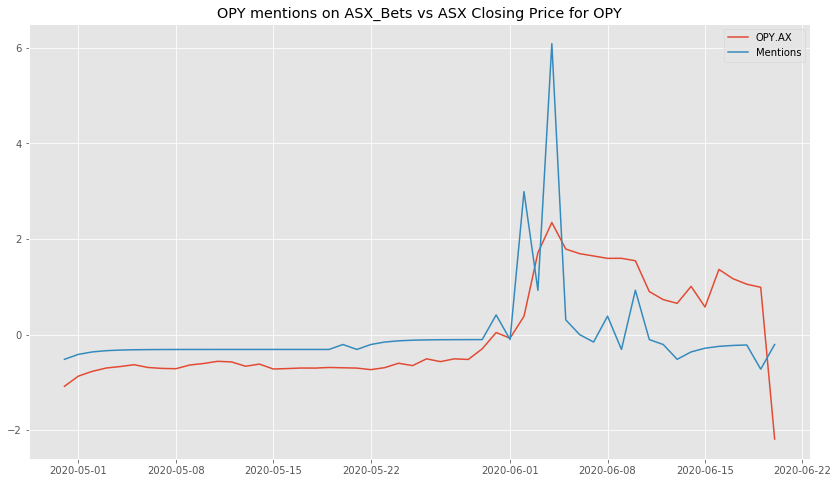

In [56]:
scaler = StandardScaler()
# get the z-scores for the values to enable a good comparison.
opy_df['ASX_Code_scaled'] = scaler.fit_transform(opy_df['ASX_Code'].values.reshape(-1,1))
opy_asx['ASX_Close_scaled'] = scaler.fit_transform(opy_asx['Close'].values.reshape(-1,1))

plt.figure(figsize=(14,8))
plt.plot(opy_asx['Date'], opy_asx['ASX_Close_scaled'], label='OPY.AX')
plt.plot(opy_df['Date'], opy_df['ASX_Code_scaled'], label='Mentions')
plt.title('OPY mentions on ASX_Bets vs ASX Closing Price for OPY')

plt.legend();

In [57]:
import numpy as np
# create 2 column Dataframe for granger causality
asx_and_mentions = pd.DataFrame(
    {'ASX' : opy_asx['Close'],
     'Mentions': opy_df['ASX_Code']})

In [58]:
# is column 2 determing column 1?
test_result = grangercausalitytests(asx_and_mentions, 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0915  , p=0.1546  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=2.2222  , p=0.1360  , df=1
likelihood ratio test: chi2=2.1752  , p=0.1403  , df=1
parameter F test:         F=2.0915  , p=0.1546  , df_denom=48, df_num=1


**Interpretation:**<br> Again, nothing significant here, we still have a high p-value in all tests. We can conclude that from this analysis mentions on the two stock forums over this date, we fail to reject that Reddit Mentions of an ASX code does not Granger-cause the price of the stock, OPY.